In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [2]:
df = pd.read_csv('./../data/sales_predict.csv',  parse_dates=['date'])

In [3]:
df

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-05-01,0,19,6584,549.0,1.0
1,2013-09-01,0,29,6584,549.0,1.0
2,2013-04-01,0,4,6584,549.0,1.0
3,2013-01-16,0,3,6584,549.0,1.0
4,2013-01-26,0,31,6584,549.0,1.0
...,...,...,...,...,...,...
3554,2015-06-03,26,29,14672,199.0,1.0
3555,2015-04-25,27,29,14672,199.0,1.0
3556,2015-02-04,27,7,14672,199.0,1.0
3557,2015-10-05,28,27,14672,229.0,1.0


In [4]:
pd.pivot_table(df, index='shop_id', columns='item_id', values='item_price'
               ,aggfunc=[np.sum]
#                ,fill_value=0
#                ,margins=True   # 合計表示
              )

sum                                              
item_id     4610      6584       14672     22092          22102
shop_id                                                        
0          179.00       NaN        NaN   1088.00            NaN
1             NaN       NaN        NaN    512.00            NaN
2             NaN   1647.00        NaN   1548.00   28750.000000
3         3588.00   1647.00    597.000    875.00    5000.000000
4         2193.00   1098.00   1393.000   1170.00    9875.000000
5         2143.00       NaN    796.000   3149.00   17500.000000
6         7974.00    549.00   4179.000   7642.20   44750.000000
7         5532.00   2745.00   2786.000   3387.00   31124.010000
8             NaN    549.00        NaN       NaN            NaN
9             NaN    549.00        NaN       NaN    4999.979798
10        1558.00    399.00    114.000   1659.44    6043.000000
12        1246.00   1098.00        NaN    108.00   92361.535714
13         358.00       NaN   1214.000       NaN            NaN
14        3539.00       NaN    398.000   3900.00   16250.000000
15        3987.00   1098.00    995.000    994.00   16250.000000
16        3887.00   3294.00    199.000   5217.00   18750.000000
17        2990.00    549.00   1592.000       NaN            NaN
18        3788.00   1647.00   1194.000   2628.00   30000.000000
19        4436.00   2745.00   2985.000   2459.00   22499.010000
20            NaN       NaN        NaN       NaN    4999.950000
21        4436.00   1098.00   1194.000   3676.00   48499.010000
22        1246.00   1098.00    398.000    704.00   31937.500000
23            NaN       NaN    199.000       NaN            NaN
24        3190.00    549.00   1393.000   1073.00   22375.000000
25       11713.00   4392.00   1990.000  10098.30  109811.510000
26        3738.00   2196.00    398.000   1112.00   52353.176667
27       10416.00   8235.00   1821.000   1487.00   27500.000000
28       15699.00  12627.00   2587.000  10800.80   36082.343333
29        3140.00   1098.00   4378.000   3027.00    1250.000000
30        3229.20   2745.00   1592.000   2071.00            NaN
31       15799.00   7686.00  11735.925   9069.77   73748.760000
32         598.00       NaN        NaN       NaN            NaN
33            NaN       NaN    398.000    595.00            NaN
34            NaN       NaN        NaN   1471.00    8749.010000
35        6212.55   3815.55   1970.050    926.00   23623.510000
36            NaN       NaN        NaN       NaN    1250.000000
37        3638.00   1098.00   2985.000   1984.00   36250.000000
38        2492.00    549.00    597.000   1846.00   26249.010000
39        1645.00       NaN    199.000   1281.00   26248.510000
41        3738.00   1098.00   1393.000   1537.00   26250.000000
42        4835.00   3843.00   1990.000   2354.00   91248.515000
43        1495.00    549.00    597.000   3822.80            NaN
44        2492.00   3843.00   1990.000   8999.00   24998.020000
45        3339.00    549.00    597.000   4332.00   23750.000000
46        8124.00   4392.00   2587.000   2559.00   27312.500000
47        3489.00   1098.00    995.000   2740.00   36250.000000
48        4835.00       NaN    199.000   1471.00   28748.020000
49            NaN       NaN        NaN    676.00   16250.000000
50        3040.00   1098.00   2348.000   4236.20   19999.010000
51        1319.00   1995.00   2448.000   2378.00    4254.480000
52        4137.00       NaN   1393.000   2439.00   21250.000000
53        3987.00       NaN   1791.000   1975.00   26125.000000
54       11213.00  12078.00   3781.000   2627.00            NaN
56        3638.00   2745.00   3015.000   2340.00   15000.000000
57        5732.00   3843.00   2786.000   8477.90   26250.000000
58        1794.00   2745.00   1592.000   2204.00   20000.000000
59        3439.00   1098.00   2786.000   6072.55    5000.000000

In [5]:
df['sales'] = df['item_price'] * df['item_cnt_day']
df.drop('date_block_num', axis=1, inplace=True)

df_gp = df.groupby(by='item_id')

In [6]:
df_new = pd.DataFrame(columns=['date', 'item_id', 'shop_id', 'sales'])
for item, context in df_gp:
    context = context.sort_values('date').loc[:, ['date', 'shop_id', 'sales']]
    start_date = context.date.min()
    end_date = context.date.max()

    tmp = pd.date_range(start=start_date, end=end_date)
    tmp = pd.DataFrame({'date': tmp.values})
    tmp['item_id'] = item
    tmp = pd.merge(tmp, context, on='date', how='left')
    tmp.fillna(0, inplace=True)
    tmp.shop_id = tmp.shop_id.astype('int')
    
    df_new = pd.concat([df_new, tmp], axis=0)
    
    print('item_id: {} \t-> \tcount: \t{} \t ({} ~ {})'.format(item, context.shape[0], start_date, end_date))


df_new

item_id: 4610 	-> 	count: 	669 	 (2013-01-02 00:00:00 ~ 2015-12-09 00:00:00)
item_id: 6584 	-> 	count: 	198 	 (2013-01-08 00:00:00 ~ 2013-12-27 00:00:00)
item_id: 14672 	-> 	count: 	440 	 (2013-01-05 00:00:00 ~ 2015-12-01 00:00:00)
item_id: 22092 	-> 	count: 	1216 	 (2013-01-01 00:00:00 ~ 2015-12-09 00:00:00)
item_id: 22102 	-> 	count: 	1036 	 (2015-01-06 00:00:00 ~ 2015-12-10 00:00:00)


,date,item_id,shop_id,sales
0,2013-01-02,4610,28,299.0
1,2013-01-03,4610,52,299.0
2,2013-01-04,4610,0,0.0
3,2013-01-05,4610,0,0.0
4,2013-01-06,4610,0,0.0
...,...,...,...,...
1207,2015-12-09,22102,56,1250.0
1208,2015-12-10,22102,42,2500.0
1209,2015-12-10,22102,46,1250.0
1210,2015-12-10,22102,39,1250.0


In [7]:
items = [6584, 22102]

for item in items:
    df_new = df_new[df_new.item_id!=item]

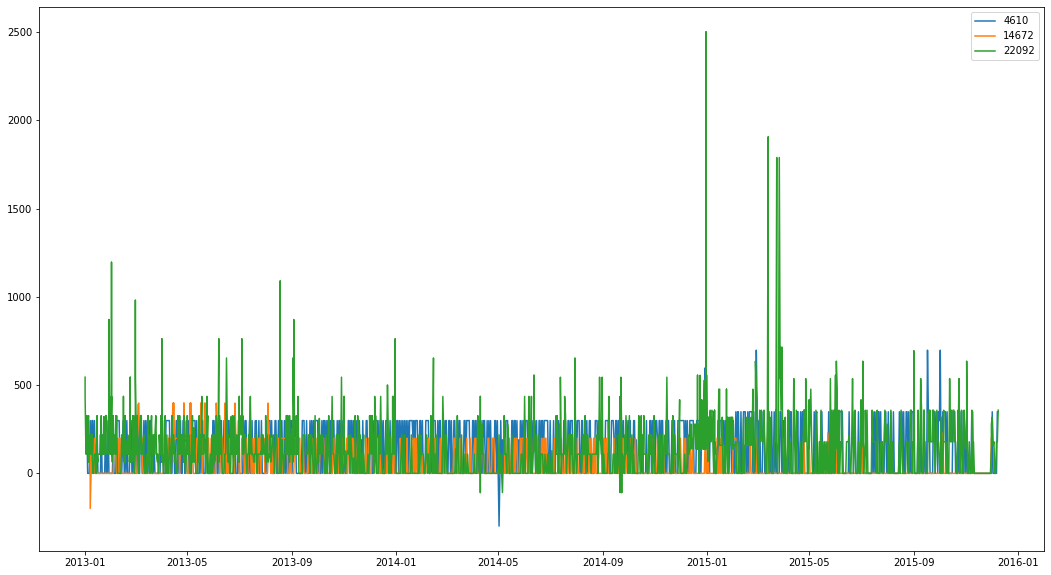

In [8]:
plt.figure(figsize=(18, 10))
for item in df_new.item_id.unique():

    plt.plot(df_new[df_new.item_id==item].date, df_new[df_new.item_id==item].sales, label=item)

plt.legend()
plt.show()

In [9]:
# [samples, timesteps, features]
df_by_item = pd.pivot_table(df_new, index='date', columns='item_id', values='sales'
               ,aggfunc=[np.sum]
               ,fill_value=0
              )

df_by_item.columns = df_by_item.columns.levels[1]
df_by_item

item_id,4610,14672,22092
date,,,
2013-01-01,0.0,0.0,981.0
2013-01-02,299.0,0.0,346.0
2013-01-03,299.0,0.0,436.0
2013-01-04,0.0,0.0,436.0
2013-01-05,0.0,597.0,1372.0
...,...,...,...
2015-12-05,0.0,0.0,0.0
2015-12-06,0.0,0.0,0.0
2015-12-07,0.0,0.0,358.0


In [10]:
def series_to_supervised(df, window=1, out=1, step=1, dropnan=True):
    agg = df.copy()
    
    if window>0:
        for i in range(0, window+1, step):
            tmp = df.shift(i)
            tmp.columns = [str(x)+'(t-{})'.format(i) for x in df.columns]
            agg = pd.concat([agg, tmp], axis=1)
        
    if out>0:
        for i in range(0, -out, -step):
            tmp = df.shift(i-1)
            tmp.columns = [str(x)+'(t+{})'.format(-i+1) for x in df.columns]
            agg = pd.concat([agg, tmp], axis=1)

        
    if dropnan:
        agg.dropna(axis=0, inplace=True)
    return agg

In [11]:
window_day = 3
predict_day = 0

In [12]:
df_ = series_to_supervised(df_by_item, window=window_day, out=predict_day)
df_.drop(df_by_item.columns.values, axis=1, inplace=True)
df_

,4610(t-0),14672(t-0),22092(t-0),4610(t-1),14672(t-1),22092(t-1),4610(t-2),14672(t-2),22092(t-2),4610(t-3),14672(t-3),22092(t-3)
date,,,,,,,,,,,,
2013-01-04,0.0,0.0,436.0,299.0,0.0,436.0,299.0,0.0,346.0,0.0,0.0,981.0
2013-01-05,0.0,597.0,1372.0,0.0,0.0,436.0,299.0,0.0,436.0,299.0,0.0,346.0
2013-01-06,0.0,199.0,109.0,0.0,597.0,1372.0,0.0,0.0,436.0,299.0,0.0,436.0
2013-01-07,299.0,0.0,545.0,0.0,199.0,109.0,0.0,597.0,1372.0,0.0,0.0,436.0
2013-01-08,0.0,0.0,109.0,299.0,0.0,545.0,0.0,199.0,109.0,0.0,597.0,1372.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-05,0.0,0.0,0.0,0.0,0.0,179.0,0.0,0.0,318.0,349.0,0.0,636.0
2015-12-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,179.0,0.0,0.0,318.0
2015-12-07,0.0,0.0,358.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,179.0


In [13]:
train_windows = 365
predict_length = 20

start_trainX_date = '2013-01-10'
end_trainX_date = (datetime.strptime(start_trainX_date, "%Y-%m-%d") + timedelta(days=train_windows)).strftime("%Y-%m-%d")

#.strftime("%Y-%m-%d")

start_trainY_date = (datetime.strptime(end_trainX_date, "%Y-%m-%d") + timedelta(days=1)).strftime("%Y-%m-%d")
end_trainY_date = (datetime.strptime(start_trainY_date, "%Y-%m-%d") + timedelta(days=predict_length)).strftime("%Y-%m-%d")


start_testX_date = (datetime.strptime(end_trainY_date, "%Y-%m-%d") - timedelta(days=train_windows)).strftime("%Y-%m-%d")
end_testX_date = end_trainY_date

start_testY_date = (datetime.strptime(end_testX_date, "%Y-%m-%d") + timedelta(days=1)).strftime("%Y-%m-%d")
end_testY_date = (datetime.strptime(start_testY_date, "%Y-%m-%d") + timedelta(days=predict_length)).strftime("%Y-%m-%d")

end_testX_date

'2014-01-31'

In [14]:
X = df_[start_trainX_date:end_trainX_date]
y = df_[start_trainY_date:end_trainY_date]
predict_X = df_[start_testX_date:end_testX_date]
predict_y = df_[start_testY_date:end_testY_date]
print(X.shape)
print(y.shape)

(366, 12)
(21, 12)


In [15]:
# future_col = []
# for i in range(1, predict_day+1, 1):
#     future_col.append([('%s(t+%d)' % (item, i)) for item in df_by_item.columns.values])

# future_col = [y for x in future_col for y in x]

In [16]:
# y = df_[future_col]
# X = df_.drop(future_col, axis=1)
# X

In [17]:
train_X = []
for i in range(window_day, 0-1, -1):
    tmp_col = [('%s(t-%d)' % (item, i)) for item in df_by_item.columns.values]
#     print(tmp_col)
#     print(type(X[tmp_col].values.tolist()))
    train_X.append(X[tmp_col].values.tolist())
train_X = np.array(train_X)
train_X.shape

(4, 366, 3)

In [18]:
train_X

array([[[299.,   0., 545.],
        [  0.,   0., 109.],
        [598., 199., 545.],
        ...,
        [299.,   0.,   0.],
        [  0., 199.,   0.],
        [299., 114., 109.]],

       [[  0.,   0., 109.],
        [598., 199., 545.],
        [299.,   0.,   0.],
        ...,
        [  0., 199.,   0.],
        [299., 114., 109.],
        [  0.,   0., 218.]],

       [[598., 199., 545.],
        [299.,   0.,   0.],
        [  0.,   0.,   0.],
        ...,
        [299., 114., 109.],
        [  0.,   0., 218.],
        [299.,   0.,   0.]],

       [[299.,   0.,   0.],
        [  0.,   0.,   0.],
        [299., 199., 109.],
        ...,
        [  0.,   0., 218.],
        [299.,   0.,   0.],
        [  0.,   0.,   0.]]])

In [19]:
train_y = []
for i in range(window_day, 0-1, -1):
    tmp_col = [('%s(t-%d)' % (item, i)) for item in df_by_item.columns.values]

    train_y.append(y[tmp_col].values.tolist())
train_y = np.array(train_y)
train_y.shape

(4, 21, 3)

In [20]:
test_X = []
for i in range(window_day, 0-1, -1):
    tmp_col = [('%s(t-%d)' % (item, i)) for item in df_by_item.columns.values]
#     print(tmp_col)
#     print(type(X[tmp_col].values.tolist()))
    test_X.append(predict_X[tmp_col].values.tolist())
test_X = np.array(test_X)
test_X.shape

(4, 366, 3)

In [21]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras import optimizers

# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(None, train_X.shape[2])))
model.add(RepeatVector(train_y.shape[1]))
model.add(LSTM(20, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(train_y.shape[2])))
model.summary()

Using TensorFlow backend.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50)                10800     
_________________________________________________________________
repeat_vector (RepeatVector) (None, 21, 50)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 21, 20)            5680      
_________________________________________________________________
time_distributed (TimeDistri (None, 21, 3)             63        
Total params: 16,543
Trainable params: 16,543
Non-trainable params: 0
_________________________________________________________________


In [22]:
adam = optimizers.Adam(lr=0.001, clipnorm=.1)

model.compile(optimizer=adam, loss='mse')
# fit model
history = model.fit(train_X, train_y, epochs=1000, verbose=1)

Epoch 1/1000
1/1 [==============================] - 0s 1ms/step - loss: 484295.0000
Epoch 2/1000
1/1 [==============================] - 0s 1ms/step - loss: 390955.2188
Epoch 3/1000
1/1 [==============================] - 0s 1ms/step - loss: 372660.2500
Epoch 4/1000
1/1 [==============================] - 0s 953us/step - loss: 386899.9375
Epoch 5/1000
1/1 [==============================] - 0s 1ms/step - loss: 292566.9375
Epoch 6/1000
1/1 [==============================] - 0s 1ms/step - loss: 282255.9062
Epoch 7/1000
1/1 [==============================] - 0s 1ms/step - loss: 276752.5312
Epoch 8/1000
1/1 [==============================] - 0s 1ms/step - loss: 264383.0000
Epoch 9/1000
1/1 [==============================] - 0s 2ms/step - loss: 252166.7344
Epoch 10/1000
1/1 [==============================] - 0s 1ms/step - loss: 243194.0938
Epoch 11/1000
1/1 [==============================] - 0s 1ms/step - loss: 242262.2188
Epoch 12/1000
1/1 [==============================] - 0s 1ms/step - loss:

1/1 [==============================] - 0s 2ms/step - loss: 38005.8086
Epoch 98/1000
1/1 [==============================] - 0s 1ms/step - loss: 37663.2695
Epoch 99/1000
1/1 [==============================] - 0s 2ms/step - loss: 37243.5078
Epoch 100/1000
1/1 [==============================] - 0s 1ms/step - loss: 37744.1484
Epoch 101/1000
1/1 [==============================] - 0s 1ms/step - loss: 37739.8438
Epoch 102/1000
1/1 [==============================] - 0s 1ms/step - loss: 37712.8516
Epoch 103/1000
1/1 [==============================] - 0s 1ms/step - loss: 37577.2695
Epoch 104/1000
1/1 [==============================] - 0s 1ms/step - loss: 37158.0859
Epoch 105/1000
1/1 [==============================] - 0s 2ms/step - loss: 37386.9336
Epoch 106/1000
1/1 [==============================] - 0s 1ms/step - loss: 37403.3672
Epoch 107/1000
1/1 [==============================] - 0s 1ms/step - loss: 37325.0312
Epoch 108/1000
1/1 [==============================] - 0s 1ms/step - loss: 36953.02

1/1 [==============================] - 0s 1ms/step - loss: 29123.7832
Epoch 194/1000
1/1 [==============================] - 0s 2ms/step - loss: 28930.4141
Epoch 195/1000
1/1 [==============================] - 0s 1ms/step - loss: 29048.3789
Epoch 196/1000
1/1 [==============================] - 0s 2ms/step - loss: 27963.8008
Epoch 197/1000
1/1 [==============================] - 0s 1ms/step - loss: 28280.4902
Epoch 198/1000
1/1 [==============================] - 0s 1ms/step - loss: 28545.5527
Epoch 199/1000
1/1 [==============================] - 0s 1ms/step - loss: 28449.7441
Epoch 200/1000
1/1 [==============================] - 0s 1ms/step - loss: 28342.7090
Epoch 201/1000
1/1 [==============================] - 0s 2ms/step - loss: 28168.2383
Epoch 202/1000
1/1 [==============================] - 0s 1ms/step - loss: 28160.3125
Epoch 203/1000
1/1 [==============================] - 0s 1ms/step - loss: 27980.7949
Epoch 204/1000
1/1 [==============================] - 0s 1ms/step - loss: 27786.

1/1 [==============================] - 0s 1ms/step - loss: 24195.7480
Epoch 290/1000
1/1 [==============================] - 0s 944us/step - loss: 24344.2852
Epoch 291/1000
1/1 [==============================] - 0s 1ms/step - loss: 23710.1445
Epoch 292/1000
1/1 [==============================] - 0s 1ms/step - loss: 24179.7754
Epoch 293/1000
1/1 [==============================] - 0s 1ms/step - loss: 24259.8398
Epoch 294/1000
1/1 [==============================] - 0s 1ms/step - loss: 24026.0117
Epoch 295/1000
1/1 [==============================] - 0s 2ms/step - loss: 23327.3398
Epoch 296/1000
1/1 [==============================] - 0s 1ms/step - loss: 24391.8457
Epoch 297/1000
1/1 [==============================] - 0s 975us/step - loss: 23521.3652
Epoch 298/1000
1/1 [==============================] - 0s 1ms/step - loss: 23481.9473
Epoch 299/1000
1/1 [==============================] - 0s 1ms/step - loss: 23023.7207
Epoch 300/1000
1/1 [==============================] - 0s 1ms/step - loss: 22

1/1 [==============================] - 0s 1ms/step - loss: 23828.4629
Epoch 386/1000
1/1 [==============================] - 0s 978us/step - loss: 22934.0586
Epoch 387/1000
1/1 [==============================] - 0s 1ms/step - loss: 23187.9707
Epoch 388/1000
1/1 [==============================] - 0s 1ms/step - loss: 22928.6387
Epoch 389/1000
1/1 [==============================] - 0s 916us/step - loss: 23033.2402
Epoch 390/1000
1/1 [==============================] - 0s 1ms/step - loss: 22645.0039
Epoch 391/1000
1/1 [==============================] - 0s 1ms/step - loss: 22139.8066
Epoch 392/1000
1/1 [==============================] - 0s 1ms/step - loss: 22430.2637
Epoch 393/1000
1/1 [==============================] - 0s 976us/step - loss: 22315.7715
Epoch 394/1000
1/1 [==============================] - 0s 1ms/step - loss: 22789.6523
Epoch 395/1000
1/1 [==============================] - 0s 1ms/step - loss: 21794.1406
Epoch 396/1000
1/1 [==============================] - 0s 1ms/step - loss: 

1/1 [==============================] - 0s 1ms/step - loss: 23728.2812
Epoch 482/1000
1/1 [==============================] - 0s 1ms/step - loss: 24218.3711
Epoch 483/1000
1/1 [==============================] - 0s 1ms/step - loss: 22806.4219
Epoch 484/1000
1/1 [==============================] - 0s 1ms/step - loss: 23208.4609
Epoch 485/1000
1/1 [==============================] - 0s 1ms/step - loss: 21856.0195
Epoch 486/1000
1/1 [==============================] - 0s 910us/step - loss: 22832.5547
Epoch 487/1000
1/1 [==============================] - 0s 1ms/step - loss: 22532.5293
Epoch 488/1000
1/1 [==============================] - 0s 845us/step - loss: 23362.5469
Epoch 489/1000
1/1 [==============================] - 0s 983us/step - loss: 23092.1602
Epoch 490/1000
1/1 [==============================] - 0s 1ms/step - loss: 22144.4121
Epoch 491/1000
1/1 [==============================] - 0s 882us/step - loss: 23962.4414
Epoch 492/1000
1/1 [==============================] - 0s 1ms/step - loss

1/1 [==============================] - 0s 978us/step - loss: 20496.1660
Epoch 578/1000
1/1 [==============================] - 0s 974us/step - loss: 20410.7988
Epoch 579/1000
1/1 [==============================] - 0s 1ms/step - loss: 20364.7871
Epoch 580/1000
1/1 [==============================] - 0s 995us/step - loss: 20777.3398
Epoch 581/1000
1/1 [==============================] - 0s 1ms/step - loss: 20637.3438
Epoch 582/1000
1/1 [==============================] - 0s 1ms/step - loss: 20221.7852
Epoch 583/1000
1/1 [==============================] - 0s 1ms/step - loss: 20547.4844
Epoch 584/1000
1/1 [==============================] - 0s 1ms/step - loss: 20155.1523
Epoch 585/1000
1/1 [==============================] - 0s 1ms/step - loss: 20119.7207
Epoch 586/1000
1/1 [==============================] - 0s 1ms/step - loss: 20119.6816
Epoch 587/1000
1/1 [==============================] - 0s 1ms/step - loss: 20233.2246
Epoch 588/1000
1/1 [==============================] - 0s 974us/step - loss

1/1 [==============================] - 0s 953us/step - loss: 20977.3945
Epoch 674/1000
1/1 [==============================] - 0s 1ms/step - loss: 20959.9023
Epoch 675/1000
1/1 [==============================] - 0s 1ms/step - loss: 20933.7949
Epoch 676/1000
1/1 [==============================] - 0s 1ms/step - loss: 20916.6387
Epoch 677/1000
1/1 [==============================] - 0s 1ms/step - loss: 20900.8828
Epoch 678/1000
1/1 [==============================] - 0s 1ms/step - loss: 20875.2441
Epoch 679/1000
1/1 [==============================] - 0s 2ms/step - loss: 20861.8223
Epoch 680/1000
1/1 [==============================] - 0s 1ms/step - loss: 20865.9844
Epoch 681/1000
1/1 [==============================] - 0s 1ms/step - loss: 20833.6660
Epoch 682/1000
1/1 [==============================] - 0s 932us/step - loss: 20789.2930
Epoch 683/1000
1/1 [==============================] - 0s 1ms/step - loss: 20761.2285
Epoch 684/1000
1/1 [==============================] - 0s 1ms/step - loss: 20

1/1 [==============================] - 0s 1ms/step - loss: 19639.3945
Epoch 770/1000
1/1 [==============================] - 0s 1ms/step - loss: 19661.7266
Epoch 771/1000
1/1 [==============================] - 0s 1ms/step - loss: 19647.7676
Epoch 772/1000
1/1 [==============================] - 0s 1ms/step - loss: 19629.0430
Epoch 773/1000
1/1 [==============================] - 0s 1ms/step - loss: 19600.7461
Epoch 774/1000
1/1 [==============================] - 0s 1ms/step - loss: 19598.5020
Epoch 775/1000
1/1 [==============================] - 0s 1ms/step - loss: 19579.9492
Epoch 776/1000
1/1 [==============================] - 0s 911us/step - loss: 19557.9180
Epoch 777/1000
1/1 [==============================] - 0s 1ms/step - loss: 19536.8398
Epoch 778/1000
1/1 [==============================] - 0s 2ms/step - loss: 19689.4570
Epoch 779/1000
1/1 [==============================] - 0s 1ms/step - loss: 19698.3086
Epoch 780/1000
1/1 [==============================] - 0s 1ms/step - loss: 1948

1/1 [==============================] - 0s 1ms/step - loss: 19129.0840
Epoch 866/1000
1/1 [==============================] - 0s 1ms/step - loss: 19112.3203
Epoch 867/1000
1/1 [==============================] - 0s 1ms/step - loss: 19120.6094
Epoch 868/1000
1/1 [==============================] - 0s 1ms/step - loss: 19206.2051
Epoch 869/1000
1/1 [==============================] - 0s 994us/step - loss: 19499.8984
Epoch 870/1000
1/1 [==============================] - 0s 1ms/step - loss: 19453.4590
Epoch 871/1000
1/1 [==============================] - 0s 984us/step - loss: 21137.4453
Epoch 872/1000
1/1 [==============================] - 0s 1ms/step - loss: 19689.2852
Epoch 873/1000
1/1 [==============================] - 0s 1ms/step - loss: 19647.6523
Epoch 874/1000
1/1 [==============================] - 0s 1ms/step - loss: 20027.5723
Epoch 875/1000
1/1 [==============================] - 0s 1ms/step - loss: 22106.7051
Epoch 876/1000
1/1 [==============================] - 0s 1ms/step - loss: 21

1/1 [==============================] - 0s 1ms/step - loss: 20060.9355
Epoch 962/1000
1/1 [==============================] - 0s 1ms/step - loss: 19545.6855
Epoch 963/1000
1/1 [==============================] - 0s 1ms/step - loss: 19920.7754
Epoch 964/1000
1/1 [==============================] - 0s 2ms/step - loss: 19574.6719
Epoch 965/1000
1/1 [==============================] - 0s 1ms/step - loss: 19409.0469
Epoch 966/1000
1/1 [==============================] - 0s 2ms/step - loss: 19585.6406
Epoch 967/1000
1/1 [==============================] - 0s 1ms/step - loss: 19392.5312
Epoch 968/1000
1/1 [==============================] - 0s 1ms/step - loss: 19364.6582
Epoch 969/1000
1/1 [==============================] - 0s 1ms/step - loss: 19354.8086
Epoch 970/1000
1/1 [==============================] - 0s 2ms/step - loss: 19337.3594
Epoch 971/1000
1/1 [==============================] - 0s 1ms/step - loss: 19325.5078
Epoch 972/1000
1/1 [==============================] - 0s 1ms/step - loss: 19295.

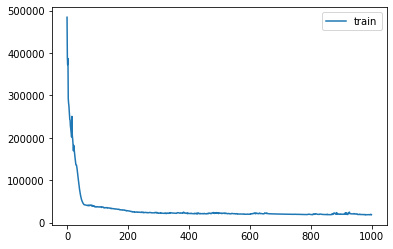

In [23]:
plt.plot(history.history['loss'], label='train')
plt.legend()
plt.show()

In [24]:
yhat = model.predict(test_X, verbose=0)
print(yhat[3,:,:])

[[   7.0810356    3.630842    11.7620735]
 [  24.320957     1.1669357   29.470722 ]
 [  29.138607     4.261825    40.377834 ]
 [  54.348976     9.41116     40.625713 ]
 [   3.4167635    6.2249784    8.241574 ]
 [  52.939827     7.402321    77.33679  ]
 [ -24.894604   -21.92831     26.760128 ]
 [  53.277294   -25.95883    124.77577  ]
 [ -52.460358   -61.200336    58.96404  ]
 [ -24.53       -64.279854    90.22255  ]
 [  23.627459   -70.12127    113.38734  ]
 [ -74.62523    -98.3655      87.1401   ]
 [ -28.503008  -102.055664   153.55168  ]
 [-100.94294   -126.756065   112.12791  ]
 [ 124.81169     -6.9759636   82.163475 ]
 [ -23.938047   -24.957594    24.257416 ]
 [  45.077217   -25.381855   113.298904 ]
 [ -48.134365   -58.819668    54.802788 ]
 [  -3.2777176  -60.06903    111.94397  ]
 [ -64.805534   -83.24211     74.58883  ]
 [  -9.927044   -87.79766    154.75392  ]]


In [25]:
yhat[3,:,:][:,0]

array([   7.0810356,   24.320957 ,   29.138607 ,   54.348976 ,
          3.4167635,   52.939827 ,  -24.894604 ,   53.277294 ,
        -52.460358 ,  -24.53     ,   23.627459 ,  -74.62523  ,
        -28.503008 , -100.94294  ,  124.81169  ,  -23.938047 ,
         45.077217 ,  -48.134365 ,   -3.2777176,  -64.805534 ,
         -9.927044 ], dtype=float32)

In [26]:
pred_col = [('%s(t-%d)' % (item, 0)) for item in df_by_item.columns.values]
predict_y[pred_col]

,4610(t-0),14672(t-0),22092(t-0)
date,,,
2014-02-01,598.0,110.0,109.0
2014-02-02,0.0,0.0,109.0
2014-02-03,0.0,0.0,0.0
2014-02-04,0.0,0.0,0.0
2014-02-05,897.0,0.0,109.0
2014-02-06,299.0,398.0,218.0
2014-02-07,299.0,199.0,0.0
2014-02-08,897.0,199.0,109.0
2014-02-09,0.0,0.0,0.0


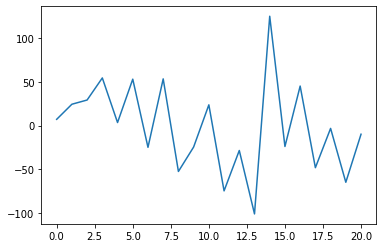

In [27]:
plt.plot(yhat[3,:,:][:,0])
plt.show()

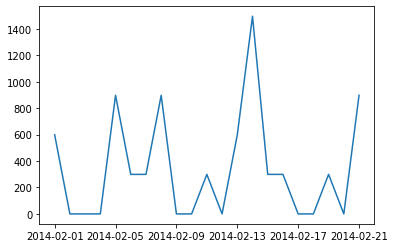

In [28]:
plt.plot(predict_y.index, predict_y.loc[:, '4610(t-0)'])
plt.show()